# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [91]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [92]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [93]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [94]:
import requests
from bs4 import BeautifulSoup

# Send a request to the webpage
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
response = requests.get(url)

# Parse the page with Beautiful Soup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table element
table = soup.find('table')

# Extract rows from the table
rows = table.find_all('tr')

# Extract headers
headers = [header.text.strip() for header in rows[0].find_all('th')]

# Extract table data
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

# Print headers and data
print(headers)
for row in data:
    print(row)


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [95]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Send a request to the webpage
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
response = requests.get(url)

# Parse the page with Beautiful Soup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table element
table = soup.find('table')

# Extract rows from the table, skipping the header
rows = table.find_all('tr')[1:]  # Skip the first row (header)

# Column names based on the description
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Extract table data
data = []
for row in rows:
    cols = row.find_all('td')
    if cols:  # Skip empty rows
        row_data = [col.get_text(strip=True) for col in cols]
        data.append(row_data)

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=columns)

# Show the DataFrame
print(df)


        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [96]:
# Check the current data types
print(df.dtypes)

# Convert columns to appropriate data types
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], errors='coerce')
df['sol'] = pd.to_numeric(df['sol'], errors='coerce')
df['ls'] = pd.to_numeric(df['ls'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

# Verify the new data types
print(df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object
id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [97]:
# Confirm DataFrame was created successfully
print(df)

        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [98]:
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], errors='coerce')
df['sol'] = pd.to_numeric(df['sol'], errors='coerce')
df['ls'] = pd.to_numeric(df['ls'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

print(df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [99]:
# Confirm type changes were successful by examining data types again
df.dtypes


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [100]:
# 1. How many months are there on Mars?
df['month'].max()

12

In [101]:
# 2. How many sols (Martian days) worth of data are there?

num_sols = df['sol'].nunique()
print(num_sols)


1867


In [102]:
# 3. What is the average minimum temperature by month?
# Group by month and calculate the average minimum temperature
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Print the result
print(avg_min_temp_by_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


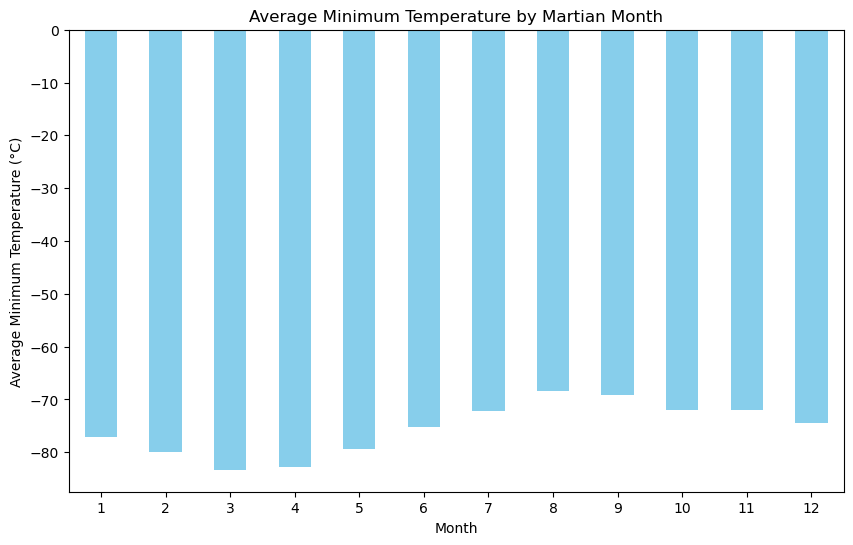

In [103]:
# Plot the average minimum temperature by month
import matplotlib.pyplot as plt

# Group by month and calculate the average minimum temperature
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plot the result
avg_min_temp_by_month.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Minimum Temperature by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.show()


Coldest Month: 3
Hottest Month: 8


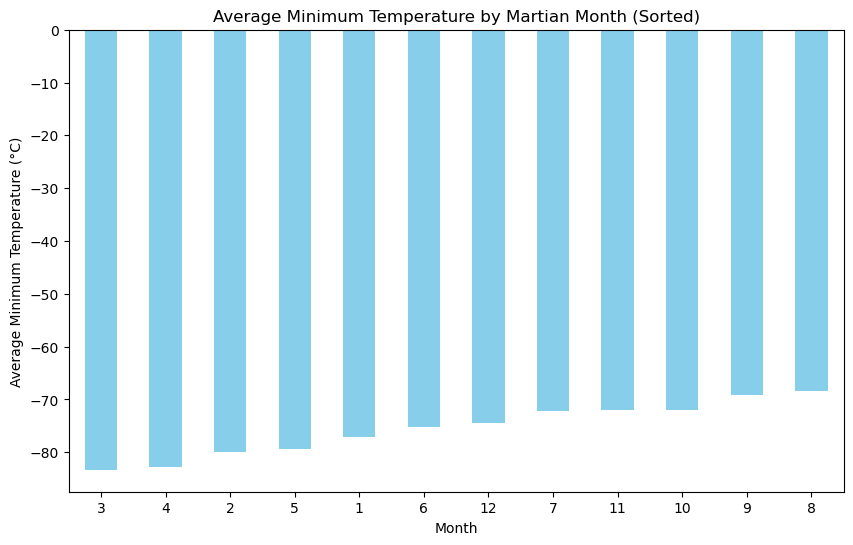

In [104]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the average minimum temperatures by month
sorted_avg_min_temp = avg_min_temp_by_month.sort_values()

# Print the coldest and hottest months
coldest_month = sorted_avg_min_temp.idxmin()
hottest_month = sorted_avg_min_temp.idxmax()

print(f"Coldest Month: {coldest_month}")
print(f"Hottest Month: {hottest_month}")

# Plot the sorted data
sorted_avg_min_temp.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Minimum Temperature by Martian Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.show()


In [105]:
# 4. What is the average pressure by month?
# Group by month and calculate the average pressure
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the result
print(avg_pressure_by_month)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


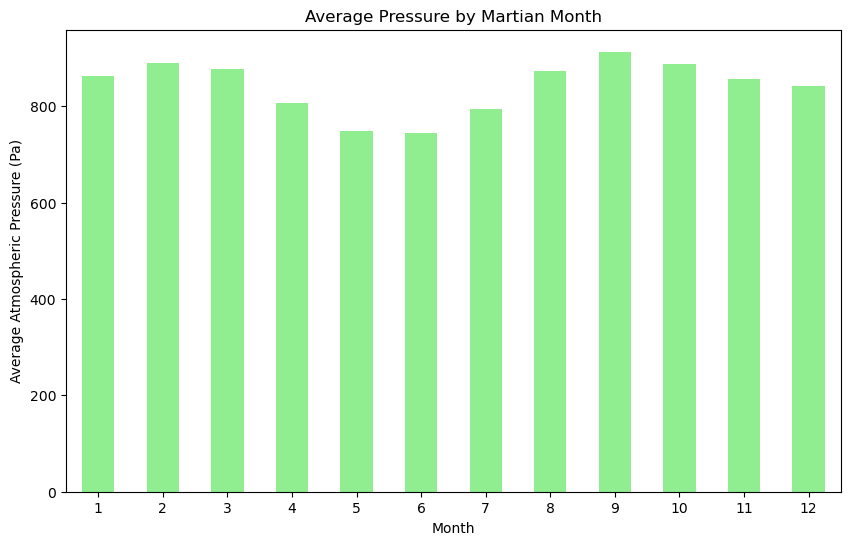

In [106]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', color='lightgreen', figsize=(10, 6))
plt.title('Average Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.xticks(rotation=0)
plt.show()


Lowest Pressure Month: 6
Highest Pressure Month: 9


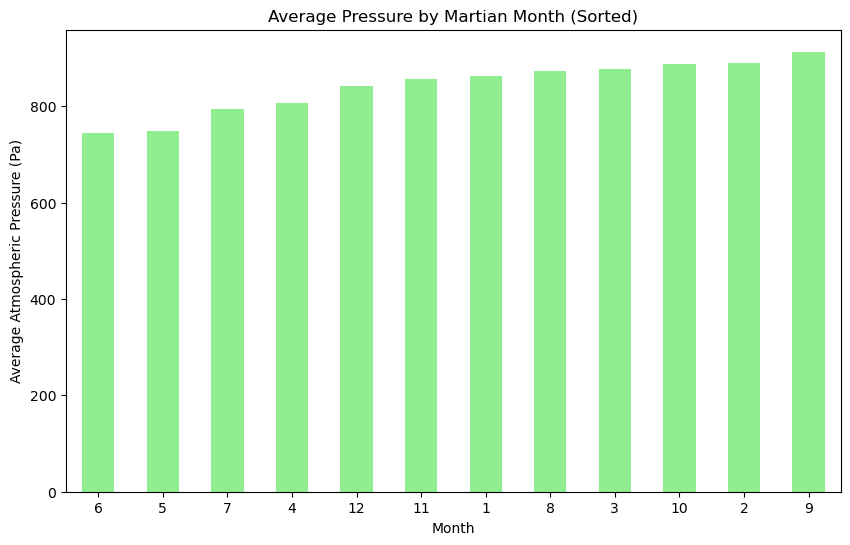

In [107]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the average pressure by month
sorted_avg_pressure = avg_pressure_by_month.sort_values()

# Print the lowest and highest pressure months
lowest_pressure_month = sorted_avg_pressure.idxmin()
highest_pressure_month = sorted_avg_pressure.idxmax()

print(f"Lowest Pressure Month: {lowest_pressure_month}")
print(f"Highest Pressure Month: {highest_pressure_month}")

# Plot the sorted data
sorted_avg_pressure.plot(kind='bar', color='lightgreen', figsize=(10, 6))
plt.title('Average Pressure by Martian Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.xticks(rotation=0)
plt.show()


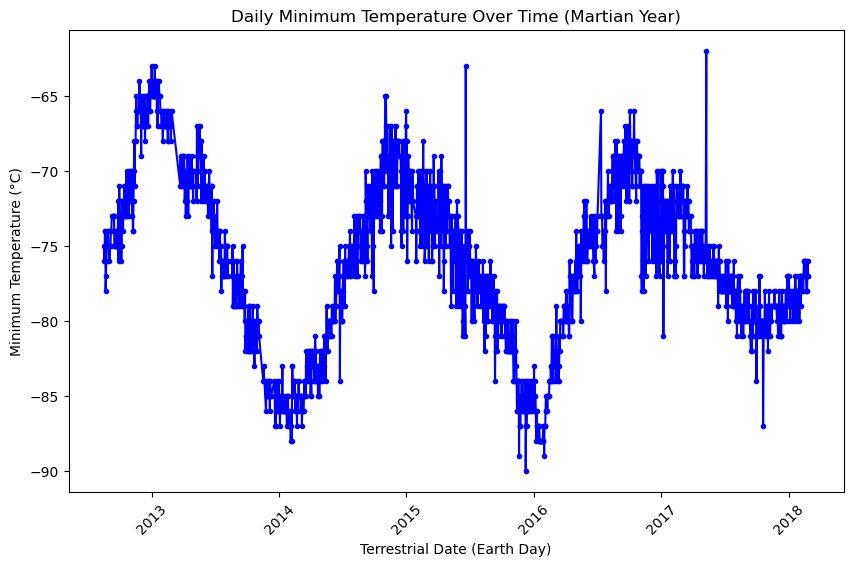

In [108]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Plot the daily minimum temperature over time
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], color='blue', marker='o', linestyle='-', markersize=3)
plt.title('Daily Minimum Temperature Over Time (Martian Year)')
plt.xlabel('Terrestrial Date (Earth Day)')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


#### Minimum Temperature
The minimum temperature data from the Curiosity rover provides insights into Martian climate patterns. By analyzing temperature trends over time, we can observe fluctuations and identify potential seasonal changes. This data is crucial for understanding the environmental conditions on Mars, including how the temperature varies across Martian days and months. Visualizing this data allows for better insight into the climate dynamics Curiosity experiences, aiding in future missions and research about Mars' atmospheric behavior.

#### Atmospheric Pressure

The atmospheric pressure data reveals how pressure on Mars fluctuates throughout Martian months. Understanding these fluctuations is important for assessing the planet's climate and its potential for supporting future missions. Pressure changes may correlate with seasonal weather patterns or solar activity. By examining the variation in pressure, we gain a deeper understanding of the Martian atmosphere, which influences rover operations and scientific experiments. Tracking these changes also helps refine our knowledge about Martian atmospheric dynamics, which is essential for human exploration.

#### Year Length

A Martian year, equivalent to about 687 Earth days, is significantly longer than an Earth year. The length of a Martian year is one of the key differences in Martian climate and seasonality compared to Earth. By tracking temperature and pressure changes over time, it's possible to visualize how long a Martian year is in terms of Earth days. Understanding the year length is essential for planning long-term Mars missions, including rover operations and potential human exploration.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [109]:
# Write the data to a CSV

df.to_csv('mars_data.csv', index=False)

print("Data has been written to 'mars_data.csv'.")


Data has been written to 'mars_data.csv'.


In [110]:
browser.quit()